## DATA CRUNCH APP- RECIPE RECOMMENDATION SYSTEM


# Overview
Tech to Tech hub has an aim of creating a recommendation system for a food company called Flavor fields. Flavor fields has a recipes platform they are trying to develop that can give  users personalized recipes based on the ingredients availables.

We aim to create an app called Data Crunch that Flavor fields' users may use to get personalized recipes based on the ingredients available to them. By focusing on the restaurants dataset, the system will offer a variety of recipes that cater to diverse ingredient lists.

## Problem statement
More often than not, people tend to have several ingredients in their homes but often find themselves with the big question "what should i cook today". 
Most tend to cook complex, timeconsuming meals that require maximum energy and even end up having to go buy more ingredients to fill up certain recipes they have researched which makes them use much more energy when they simply could have used the ingredients that were available.
This justifies the fact that users  often struggle with meal planning and recipe discovery due to the overwhelming number of options and lack of personalized suggestions. A generalized recipe recommender system will address these challenges by offering tailored recipe suggestions based on the ingredients user's input, thus improving meal planning and reducing food waste.

### Objectives
The main objective is to develop an interactive and user-friendly recommender system that provides personalized recipe suggestions based on user-input ingredients.

Specific Objectives.

•	Dynamic Recipe Matching: Develop an algorithm that matches user-input ingredients with a comprehensive recipe database, offering tailored recipe suggestions.

•   User Interface and Experience Design: Develop an intuitive and user-friendly interface for users to easily browse recipes, read reviews, and receive







### Data understanding
In this project we have two Datasets one obtained from Kaggle and another with reviews obtained from https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset.


The recipe review and user feedback data set contains the following columns:

1. recipe number: {placement of the recipe on the top 100 recipes list}

2. recipe name: {name of the recipe the comment was posted on}

3. recipe code: {unique id of the recipe used by the site}

4. comment id: {unique id of the comment}

5. user id: {unique id of the user who left the comment}

6. user name: {name of the user}

7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}

8. create at: {time at which the comment was posted as a Unix timestamp}

9. reply count: {number of replies to the comment}

10. thumbs up: {number of up-votes the comment has received}

11. thumbs down: {the number of down votes the comment received}

12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}

13. best score: {score of the comment, likely used by the site to help determine the order in the comments that appear in}

14. text: {the text content of the comment}

Apart from the reviews dataset we have the ingredients dataset which contains:

1. A recipe name

2. ingredients

3. Cooking  instructions

It should be noted that despite having recipes in the dataset with ingredients, one may have a few ingredients that could cook more than two meals in the dataset hence this recommender system may come in handy.

# 1. Data cleaning

In [59]:
#Data cleaning
import pandas as pd
import numpy as np


#Tokenization
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

#EDA
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
! pip install surprise
from surprise import SVD, KNNBasic, KNNWithMeans, Reader, Dataset,KNNBaseline
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from surprise import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/silviagworit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silviagworit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
#We load all three datasets
reviews_df = pd.read_csv("Datasets/Recipe Reviews and User Feedback Dataset 2.csv", index_col=0)
recipes_df = pd.read_csv("Datasets/Recipe Ingredients and Cooking Instructions Dataset.csv")



In [61]:
reviews_df.head()


,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [62]:
recipes_df.head()

,recipe_code,recipe_name,ingredients,cooking_instructions
0,14299,Creamy White Chili,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u..."
1,3309,Best Ever Banana Bread,"2-3 ripe bananas, mashed\n1/3 cup melted butte...",1. Preheat oven to 350°F (175°C). Grease a 9x5...
2,2832,Cheeseburger Soup,"1 lb ground beef\n1 onion, chopped\n2 cloves g...","1. In a large pot, brown ground beef over medi..."
3,17826,Amish Breakfast Casserole,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,42386,Pumpkin Spice Cupcakes with Cream Cheese Frosting,For the cupcakes:\n1 1/2 cups all-purpose flou...,For the cupcakes:\n1. Preheat oven to 350°F (1...


#### 1.1 Reviews dataset

In [63]:
#let's first work with the reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18182 entries, 0 to 118
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_code      18182 non-null  int64 
 2   recipe_name      18182 non-null  object
 3   comment_id       18182 non-null  object
 4   user_id          18182 non-null  object
 5   user_name        18182 non-null  object
 6   user_reputation  18182 non-null  int64 
 7   created_at       18182 non-null  int64 
 8   reply_count      18182 non-null  int64 
 9   thumbs_up        18182 non-null  int64 
 10  thumbs_down      18182 non-null  int64 
 11  stars            18182 non-null  int64 
 12  best_score       18182 non-null  int64 
 13  text             18180 non-null  object
dtypes: int64(9), object(5)
memory usage: 2.1+ MB


It is already clear that the text column has two missing values in two of the rows

In [64]:
print(reviews_df.shape)

(18182, 14)


In [65]:
#Let's double check on missing values and just drop since they are only 2 out of 18182 entries
reviews_df.isnull().sum()

recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

In [66]:
reviews_df.duplicated().sum()

0

#### 1.11 To check for completeness and consistency on reviews dataset
We come up with a function that we can use for both the datasets to check for the above two through checking for missing values and duplicates if any

In [67]:


class DataCleaner:
    def __init__(self, df):
        """
        Initializing the DataCleaner with a DataFrame.
        
        Parameters:
        - df (pd.DataFrame): The DataFrame to clean.
        """
        self.df = df

    def drop_missing_values(self, how='any', subset=None):
        """
        Drops rows with missing values from the DataFrame.
        
        - how (str): Determines if a row is dropped when there are missing values:
            - 'any' (default): Drop rows if any NA values are present.
            - 'all': Drop rows if all values are NA.
        - subset (list): List of column names to consider. If None, apply to all columns.
        """
        self.df = self.df.dropna(how=how, subset=subset)

    def remove_duplicates(self, subset=None):
        """
        This is to remove duplicate rows from the DataFrame.
        
        - subset (list): List of column names to consider for duplicates. If None, consider all columns.
        """
        self.df = self.df.drop_duplicates(subset=subset)
    
    def clean_brackets(self, column_name):
        """
        Removes only the brackets from string representations of lists in a column.
        
        - column_name (str): The name of the column to clean.
        """
        # Remove only the square brackets and the quotes, keeping the content intact
        self.df[column_name] = self.df[column_name].apply(lambda x: re.sub(r"^\[|\]$", "", str(x)).replace("'", ""))
    
    def remove_whitespace_rows(self, column_name):
        """
        Removes rows where the specified column contains only whitespace or is empty.
        
        - column_name (str): The name of the column to clean.
        """
        # Remove rows where the column has only whitespace or is empty
        self.df = self.df[~self.df[column_name].apply(lambda x: isinstance(x, str) and x.strip() == '')]

    def clean_data(self, dropna_how='any', dropna_subset=None, remove_duplicates=True, dup_subset=None, clean_brackets_column=None, remove_whitespace_column=None):
        """
        Performs general data cleaning by dropping missing values, removing duplicates, cleaning brackets, and removing whitespace rows.
        
        Parameters:
        - dropna_how (str): How to drop missing values ('any' or 'all').
        - dropna_subset (list): Subset of columns to consider for dropping missing values.
        - remove_duplicates (bool): Whether to remove duplicates (default is True).
        - dup_subset (list): Subset of columns to consider for duplicate removal.
        - clean_brackets_column (str): The name of the column to clean brackets from.
        - remove_whitespace_column (str): The name of the column to remove rows with whitespace or empty strings from.
        
        Returns:
        - pd.DataFrame: The cleaned DataFrame.
        """
        self.drop_missing_values(how=dropna_how, subset=dropna_subset)
        if remove_duplicates:
            self.remove_duplicates(subset=dup_subset)
        if clean_brackets_column:
            self.clean_brackets(clean_brackets_column)
        if remove_whitespace_column:
            self.remove_whitespace_rows(remove_whitespace_column)
        return self.df

      


In [68]:
cleaned_review = DataCleaner(reviews_df)

In [69]:
cleaned_reviews_df = cleaned_review.clean_data(dropna_how='any', remove_duplicates=True)


In [70]:
cleaned_reviews_df.isna().sum()

recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [71]:
print(f'The cleaned_reviews data has {cleaned_reviews_df.isna().sum().sum()} missing values')

The cleaned_reviews data has 0 missing values


In [72]:
cleaned_reviews_df = cleaned_reviews_df.drop(columns=[ 'recipe_code', 'comment_id'])

In [73]:
# converting 'created_at' to datetime
cleaned_reviews_df['created_at'] = pd.to_datetime(cleaned_reviews_df['created_at'], unit='s')


In [74]:
cleaned_reviews_df.head()

,recipe_number,recipe_name,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,Creamy White Chili,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,Creamy White Chili,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,Creamy White Chili,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,Creamy White Chili,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,Creamy White Chili,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


#### 1.2 Second dataset Recipes dataset (checking for completeness)

In [75]:
#let's work on the second dataset the recipes dataframe
recipes_df.isnull().sum()

recipe_code             0
recipe_name             0
ingredients             0
cooking_instructions    0
dtype: int64

In [76]:
recipes_df.duplicated().sum()

0

In [77]:
print(f'The recipes data has {recipes_df.isna().sum().sum()} missing values')

The recipes data has 0 missing values


In [78]:
recipes_df = recipes_df.drop(columns=['recipe_code'])

In [79]:
recipes_df.head()

,recipe_name,ingredients,cooking_instructions
0,Creamy White Chili,"1 lb chicken breast, diced\n1 onion, chopped\n...","1. In a large pot, cook diced chicken breast u..."
1,Best Ever Banana Bread,"2-3 ripe bananas, mashed\n1/3 cup melted butte...",1. Preheat oven to 350°F (175°C). Grease a 9x5...
2,Cheeseburger Soup,"1 lb ground beef\n1 onion, chopped\n2 cloves g...","1. In a large pot, brown ground beef over medi..."
3,Amish Breakfast Casserole,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,Pumpkin Spice Cupcakes with Cream Cheese Frosting,For the cupcakes:\n1 1/2 cups all-purpose flou...,For the cupcakes:\n1. Preheat oven to 350°F (1...


In [80]:
recipes_df.shape

(100, 3)

#### 1.21 Check for uniformity

In [81]:
cleaned_reviews_df.dtypes


recipe_number               int64
recipe_name                object
user_id                    object
user_name                  object
user_reputation             int64
created_at         datetime64[ns]
reply_count                 int64
thumbs_up                   int64
thumbs_down                 int64
stars                       int64
best_score                  int64
text                       object
dtype: object

In [82]:
recipes_df.dtypes

recipe_name             object
ingredients             object
cooking_instructions    object
dtype: object

In [83]:
print(f'The second dataset seems to have {recipes_df.isnull().sum().sum()} missing values and {recipes_df.duplicated().sum().sum()} duplicates we will use this later for feature engineering')

The second dataset seems to have 0 missing values and 0 duplicates we will use this later for feature engineering


#### 2. Feature Engineering

In [84]:
#let's first merge our datasets
data = pd.merge(cleaned_reviews_df,recipes_df, on= 'recipe_name', how= 'outer')

In [85]:
data.head()

,recipe_number,recipe_name,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,ingredients,cooking_instructions
0,4,Amish Breakfast Casserole,u_M0Hsk3nHA40f,ladycubsfan,1,2022-10-04 16:45:01,0,7,0,5,823,I am not a fan of cottage cheese at all outsid...,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
1,4,Amish Breakfast Casserole,u_NcLB5YVan0pK,Sandy297,30,2022-08-24 19:29:08,0,6,21,2,572,"I made this; added fresh spinach, green pepper...","6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
2,4,Amish Breakfast Casserole,u_JIrp9OWJZlqa,Chris765,1,2022-08-02 02:34:31,0,13,2,5,818,Made this tonight for dinner. Followed the rec...,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
3,4,Amish Breakfast Casserole,u_GsMO6Vs1zfe7,Marnie246,1,2022-07-02 18:13:53,0,20,1,4,869,I use diced ham I purchase in the package inst...,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...
4,4,Amish Breakfast Casserole,u_f09qx6gNErmR,lpetty,50,2022-06-28 21:30:43,0,34,8,5,826,I love this recipe. I’ve made it several time ...,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...


In [86]:
#Let's rename the starts columns to ratings for simplicity
data.rename(columns={'stars': 'ratings'}, inplace=True)

In [87]:
# Extract column and create a new 'month' column
data['month'] = data['created_at'].dt.month

#### let's drop more columns that are unnecessary
the text column is not helpful in suggesting any ingredients what we really need is the ingredients to be able to recommned meals based off the recipe name we have assuming the model will be able to come up with similar recipes.

In [88]:
data.drop(columns=['created_at','text','user_name'], inplace=True)

In [89]:
#Let's create a copy of the data named EDA before normalization of text so that we can use it for EDA while the text still makes sense
Eda_data = data.copy()

In [90]:
data['user_id'] = pd.Series(np.random.randint(0, 100, size=data.shape[0]))

In [91]:
data.head()

,recipe_number,recipe_name,user_id,user_reputation,reply_count,thumbs_up,thumbs_down,ratings,best_score,ingredients,cooking_instructions,month
0,4,Amish Breakfast Casserole,51,1,0,7,0,5,823,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...,10
1,4,Amish Breakfast Casserole,92,30,0,6,21,2,572,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...,8
2,4,Amish Breakfast Casserole,14,1,0,13,2,5,818,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...,8
3,4,Amish Breakfast Casserole,71,1,0,20,1,4,869,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...,7
4,4,Amish Breakfast Casserole,60,50,0,34,8,5,826,"6 slices bread, cubed\n1 lb bulk pork sausage,...",1. Preheat oven to 350°F (175°C). Grease a 9x1...,6


## 3 EXPLORATORY DATA ANALYSIS

In [92]:
Eda_data['ingredients_list'] = Eda_data['ingredients'].str.split('\n')

In [93]:

# Count frequency of each ingredient
all_ingredients = Eda_data['ingredients_list'].explode()
ingredient_frequency = Counter(all_ingredients)
ingredient_frequency_df = pd.DataFrame(ingredient_frequency.items(), columns=['Ingredient', 'Frequency']).sort_values(by='Frequency', ascending=False)
print(ingredient_frequency_df)

                                            Ingredient  Frequency
6                             Salt and pepper to taste       3917
38                                   1/2 teaspoon salt       3153
39                                 1/4 teaspoon pepper       2839
171                                   1 onion, chopped       2793
172                            2 cloves garlic, minced       2793
..                                                 ...        ...
404                          1 tablespoon chili powder         86
405                             1 garlic clove, minced         86
408                                          TOPPINGS:         86
592                         8 ounces uncooked linguine         31
593  1/4 cup minced fresh basil or 1 tablespoon dri...         31

[614 rows x 2 columns]


# Univariate Analysis

/var/folders/93/q33lm07d0w7_xyw6zd1ckv_40000gn/T/ipykernel_29874/4172127736.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ingredient', data=top_ingredients, palette='viridis')


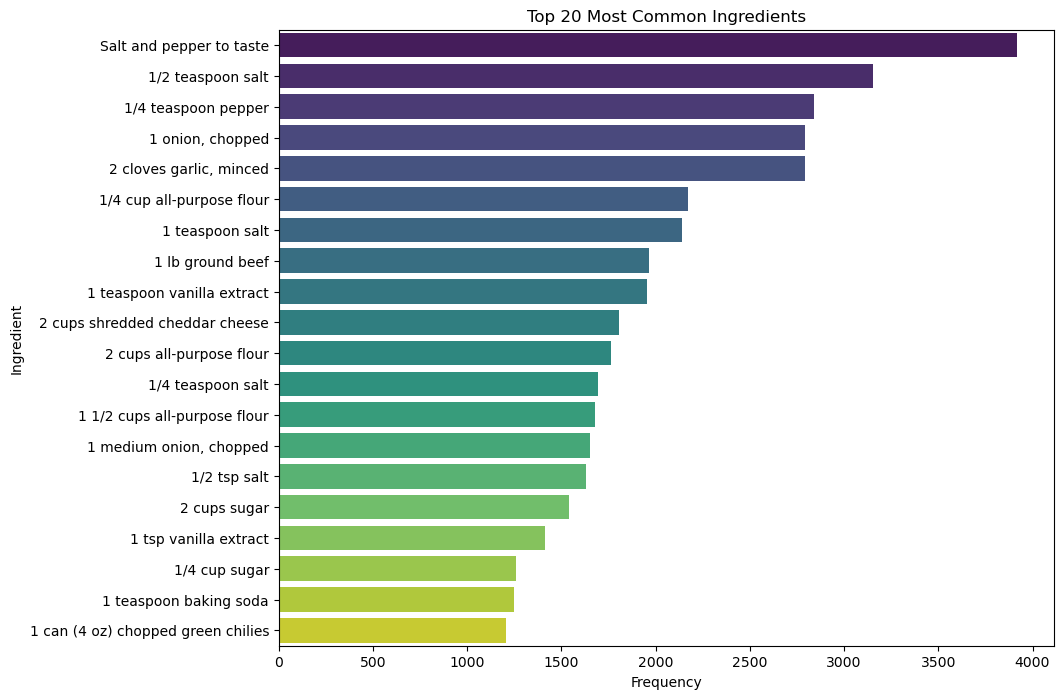

In [94]:
plt.figure(figsize=(10, 8))
top_ingredients = ingredient_frequency_df.head(20)
sns.barplot(x='Frequency', y='Ingredient', data=top_ingredients, palette='viridis')
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.show()

# Observation

- Ingredients associated with savory recipes occur at a much higher frequency.

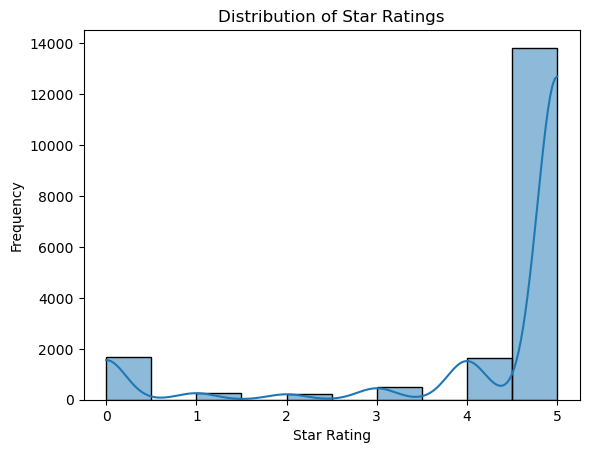

In [95]:
if 'stars' in cleaned_reviews_df.columns:
    sns.histplot(cleaned_reviews_df['stars'], bins=10, kde=True)
    plt.title('Distribution of Star Ratings')
    plt.xlabel('Star Rating')
    plt.ylabel('Frequency')
    plt.show()


# Observations

High satisfaction observed from 5 stars

Notable 'total dissatisfaction' and equal 'almost satisfaction' observed by 0 stars and 4 stars

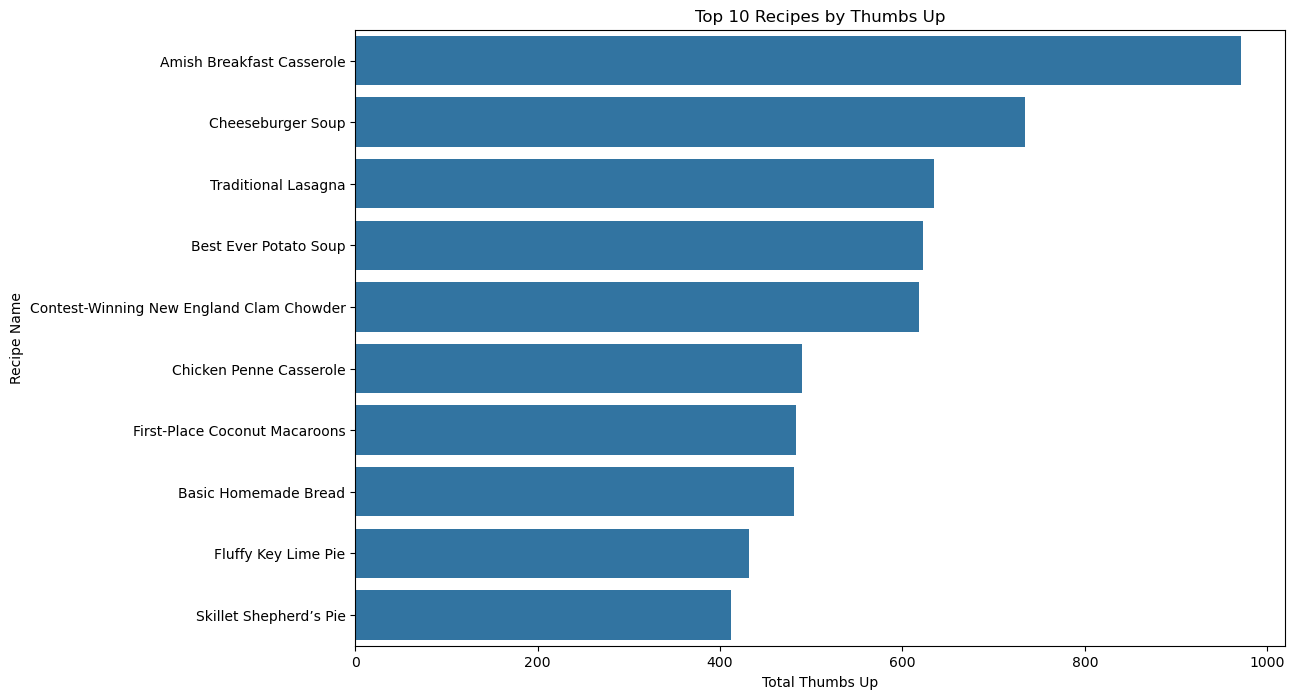

In [96]:
if 'recipe_name' in cleaned_reviews_df.columns and 'thumbs_up' in cleaned_reviews_df.columns:
    top_recipes = cleaned_reviews_df.groupby('recipe_name')['thumbs_up'].sum().nlargest(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_recipes.values, y=top_recipes.index)
    plt.title('Top 10 Recipes by Thumbs Up')
    plt.xlabel('Total Thumbs Up')
    plt.ylabel('Recipe Name')
    plt.show()

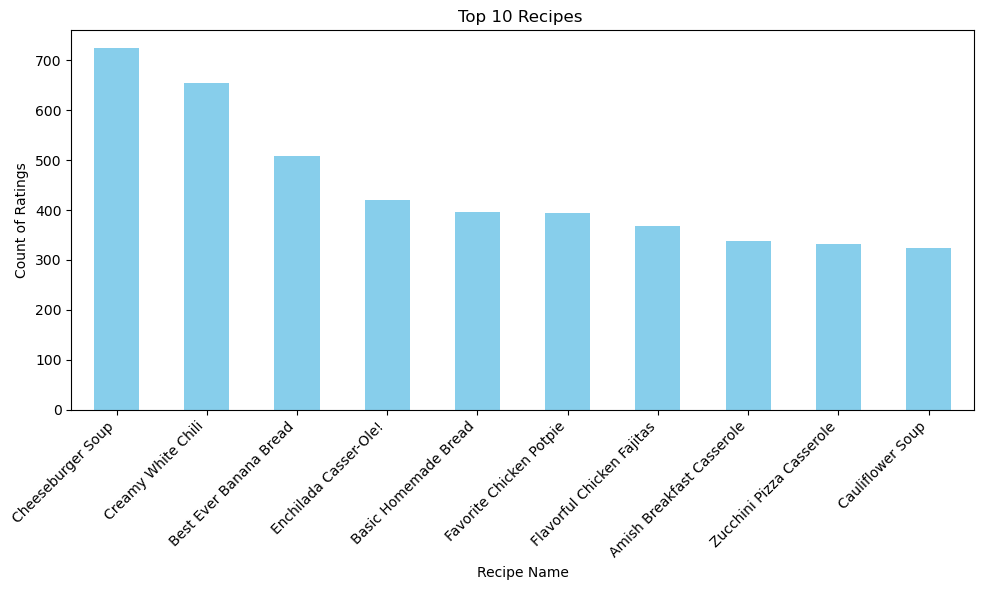

In [97]:
# Group by recipe_name and count the number of ratings
top_10_recipes = data['recipe_name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_10_recipes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Recipes ')
plt.xlabel('Recipe Name')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

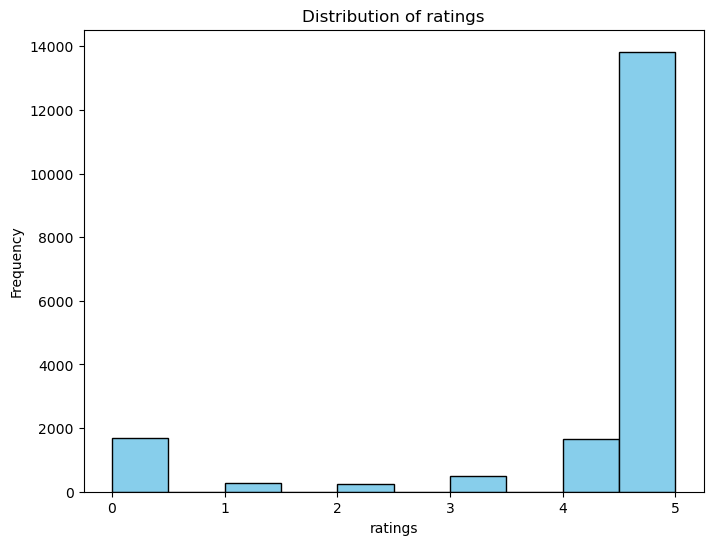

In [98]:
plt.figure(figsize=(8, 6))
plt.hist(data['ratings'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of ratings')
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

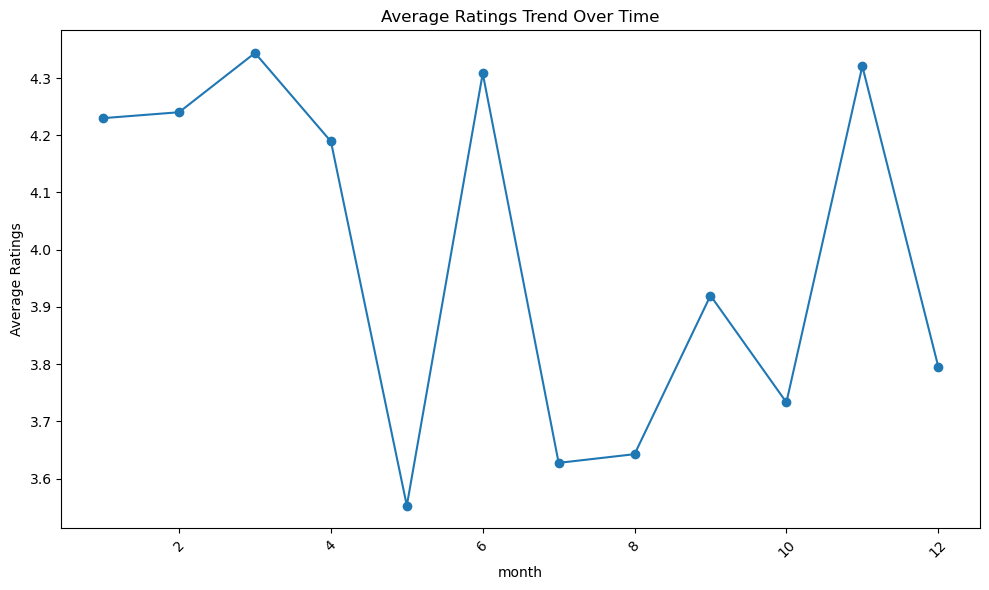

In [99]:
# Grouping by month to calculate average ratings
ratings_trend = data.groupby('month')['ratings'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ratings_trend['month'], ratings_trend['ratings'], marker='o')
plt.title('Average Ratings Trend Over Time')
plt.xlabel('month')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

# Observation

- The line shows some fluctuations in the average rating over time.There's a possibility of a slight downward trend in the average rating as the months progress

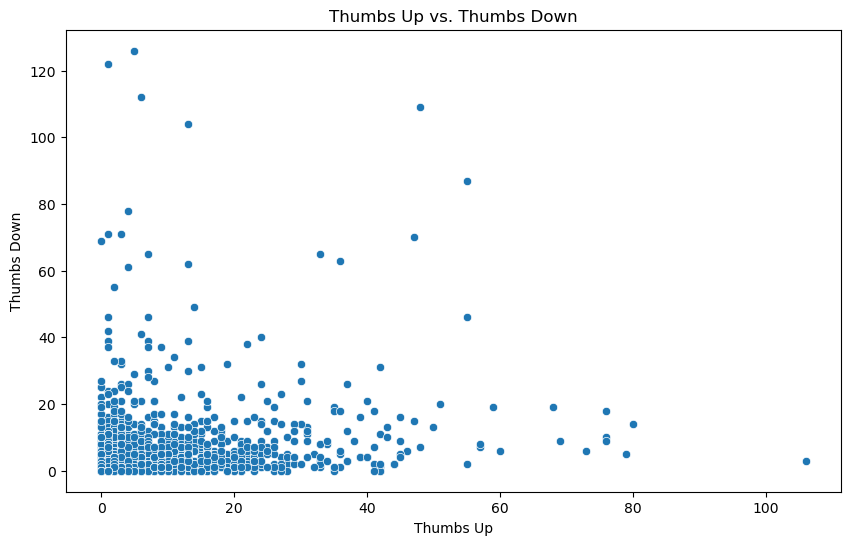

In [100]:
if 'thumbs_up' in cleaned_reviews_df.columns and 'thumbs_down' in cleaned_reviews_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='thumbs_up', y='thumbs_down', data=cleaned_reviews_df)
    plt.title('Thumbs Up vs. Thumbs Down')
    plt.xlabel('Thumbs Up')
    plt.ylabel('Thumbs Down')
    plt.show()

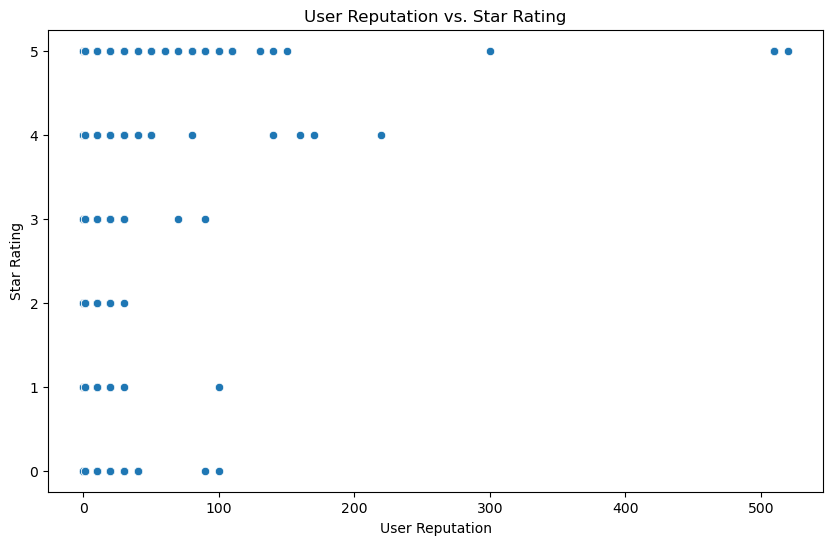

In [101]:
if 'user_reputation' in cleaned_reviews_df.columns and 'stars' in cleaned_reviews_df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='user_reputation', y='stars', data=cleaned_reviews_df)
    plt.title('User Reputation vs. Star Rating')
    plt.xlabel('User Reputation')
    plt.ylabel('Star Rating')
    plt.show()

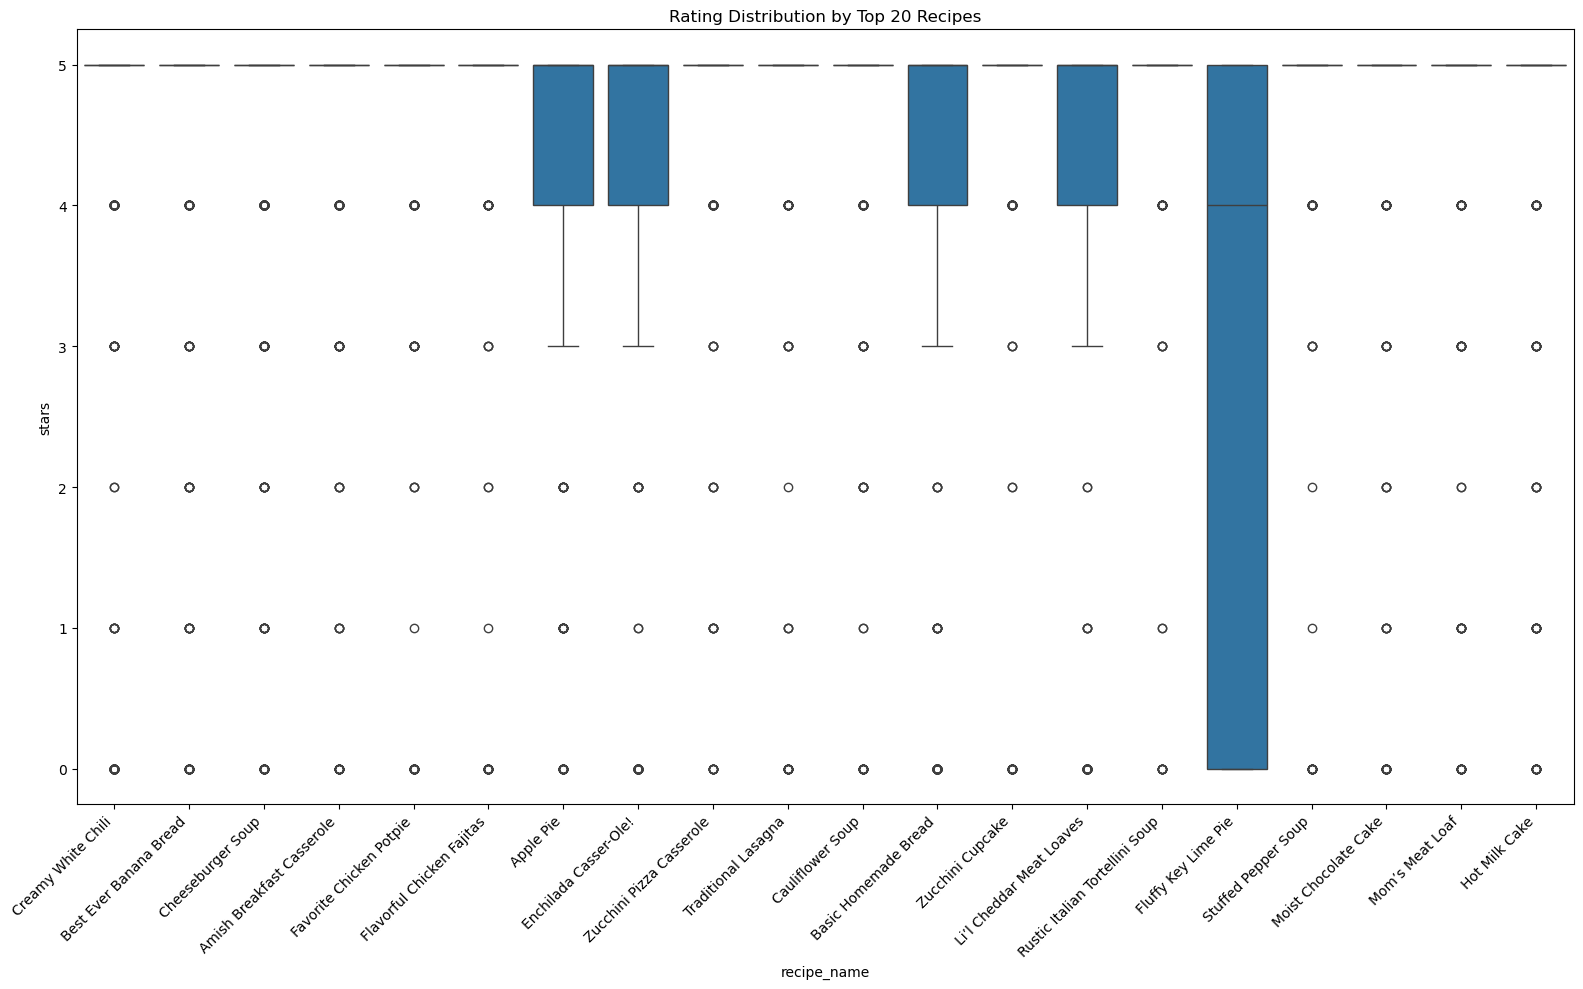

In [102]:
# Count the number of reviews per recipe
top_20_recipes = cleaned_reviews_df['recipe_name'].value_counts().nlargest(20).index

# Filter the dataset to include only the top 20 recipes
filtered_df = cleaned_reviews_df[cleaned_reviews_df['recipe_name'].isin(top_20_recipes)]

# Plotting the boxplot for the top 20 recipes
if 'recipe_name' in cleaned_reviews_df.columns and 'stars' in cleaned_reviews_df.columns:
    plt.figure(figsize=(16, 10))
    sns.boxplot(x='recipe_name', y='stars', data=filtered_df)
    plt.title('Rating Distribution by Top 20 Recipes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Multivariate Analysis

In [103]:
# Pearson coefficient of numeric columns
numerical_columns_df = data[[
    'user_reputation',
    'reply_count',
    'thumbs_up',
    'thumbs_down',
    'ratings',
    'best_score'

]]
numerical_columns_df.corr()

,user_reputation,reply_count,thumbs_up,thumbs_down,ratings,best_score
user_reputation,1.000000,0.010609,0.057860,0.022888,0.015560,0.137896
reply_count,0.010609,1.000000,0.208786,0.327619,-0.119689,0.201303
thumbs_up,0.057860,0.208786,1.000000,0.373248,-0.050872,0.684834
thumbs_down,0.022888,0.327619,0.373248,1.000000,-0.142549,0.215397
ratings,0.015560,-0.119689,-0.050872,-0.142549,1.000000,-0.034245
best_score,0.137896,0.201303,0.684834,0.215397,-0.034245,1.000000


# Observations

 The correlation matrix provides valuable insights into the relationships between different features.
 For instance, thumbs up and best score have a strong positive correlation, suggesting that users who give more thumbs up tend to have higher best scores. On the other hand, reply count and ratings have a weak negative relationship, implying that users who reply more may give slightly lower ratings.

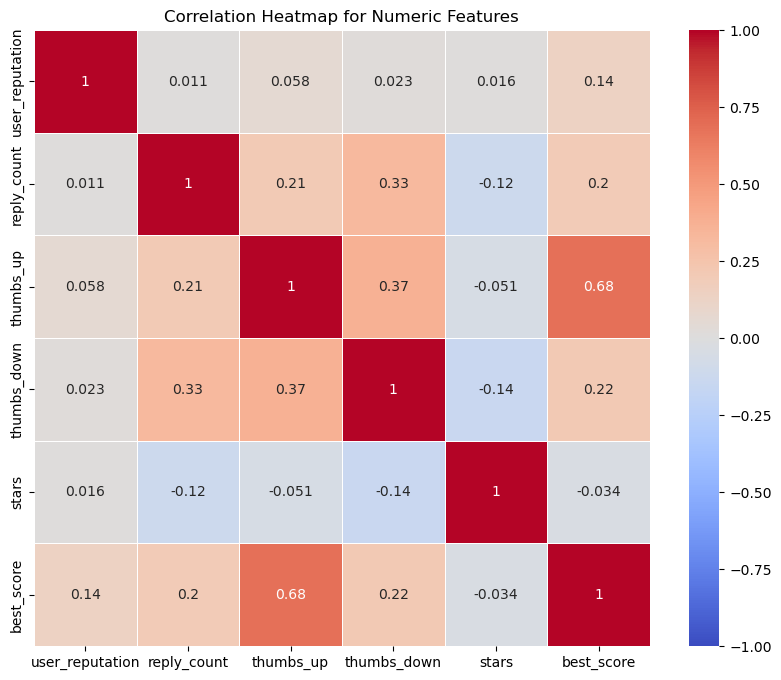

In [104]:
# Select numeric columns for correlation analysis
numeric_columns = ['user_reputation', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']

# Compute the correlation matrix
corr_matrix = cleaned_reviews_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

## Observation
The items have a weak correlation besides the expected eg thumbs up and best score

## 4. MODELLING

## 4.1 Model Selection

In [105]:
# Define the Reader and load the data
reader = Reader(rating_scale=(0, 5))

df = Dataset.load_from_df(data[['user_id', 'recipe_number', 'ratings']], reader)

## 4.1.1 Baseline model - KNNBasic

In [106]:
# perform a train test split
trainset, testset = train_test_split(df, test_size=0.2, random_state=42)


# Instantiate and fit the model
model_1 = KNNBasic(random_state = 42)
model_1.fit(trainset)

from surprise import accuracy

# Evaluate the model
prediction_1 = model_1.test(testset)

# Compute accuracy metrics
rmse_1 = accuracy.rmse(prediction_1)
mae_1 = accuracy.mae(prediction_1)

# Calculate percentage accuracy
rating_scale= 6
percentage_accuracy = 100 * (1 - (rmse_1 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_1:.4f}")
print(f"Mean Absolute Error (MAE): {mae_1:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5667
MAE:  1.0372
Root Mean Squared Error (RMSE): 1.5667
Mean Absolute Error (MAE): 1.0372
Percentage Accuracy: 73.89%


In [107]:
# Displaying the first 5 predictions with actual ratings
for i, (prediction) in enumerate(prediction_1):
    if i >= 5:
        break
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")


Predicted rating: 2.56
Actual rating: 0.00
---
Predicted rating: 4.29
Actual rating: 5.00
---
Predicted rating: 4.79
Actual rating: 5.00
---
Predicted rating: 4.45
Actual rating: 5.00
---
Predicted rating: 4.37
Actual rating: 5.00
---


Root Mean Squared Error(RMSE) - The RMSE value of 1.5667 tells us the average magnitude of error between the predicted ratings and the actual ratings

Mean Squared Error(MAE)- The MAE value of 1.0372 tells us the average absolute error between the predicted ratings and the actual ratings

The overall model has a prediction accuracy of 73.67%. Our goal is to improve that so as to get the best predictions.

## 4.1.2 KNNBaseline & KNNWithMeans

In [108]:
from surprise import accuracy

def evaluate_models(models, trainset, testset, rating_scale=6):

    results = {}

    for model in models:
        model_name = model.__class__.__name__

        # Fit the model
        model.fit(trainset)

        # Make predictions
        predictions = model.test(testset)

        # Compute accuracy metrics
        rmse = accuracy.rmse(predictions, verbose=False)
        mae = accuracy.mae(predictions, verbose=False)

        # Calculate percentage accuracy
        percentage_accuracy = 100 * (1 - (float(rmse) / rating_scale))
        results[model_name] = {
            'RMSE': float(rmse),
            'MAE': float(mae),
            'Percentage Accuracy': float(percentage_accuracy)
        }

    return results


# Instantiate models
model1 = KNNBaseline( random_state=42)
model2 = KNNWithMeans(random_state=42)



# List of models to evaluate
models = [model1, model2]

# Evaluate models
results = evaluate_models(models, trainset, testset)

# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.4f}")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
    print(f"Percentage Accuracy: {metrics['Percentage Accuracy']:.2f}%")

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

KNNBaseline Performance:
Root Mean Squared Error (RMSE): 1.5665
Mean Absolute Error (MAE): 1.0634
Percentage Accuracy: 73.89%

KNNWithMeans Performance:
Root Mean Squared Error (RMSE): 1.5667
Mean Absolute Error (MAE): 1.0693
Percentage Accuracy: 73.89%


KNNBaseline has an RMSE value of 1.5665 and an MAE of 1.0634
KNNWithMeans has an RMSE value OF 1.5667 and an MAE of 1.0693
They both have an accuracey of 73.89%.

For the above models we see that although the RMSE and MAE values are slightly higher for both models, they have a similar accuracey percentage to our baseline model and we want to improve our accuracey.

## Cross Validation

In [109]:
# Define and evaluate models
def evaluate_models(data):
    # Define a list of models to evaluate

    models = [
        KNNBasic(sim_options={'name': 'cosine', 'user_based': True}),
        KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True}),
        KNNBaseline(sim_options={'name': 'cosine', 'user_based': True})
            ]

    results = []
    for model in models:
        # Perform cross-validation
        cv_results = cross_validate(model, df, measures=['RMSE'], cv=5, verbose=False)

        # Get the average RMSE from cross-validation
        rmse = cv_results['test_rmse'].mean()

        # Store the model and its performance
        results.append({'model': model.__class__.__name__, 'rmse': rmse})

    # Sort the results based on the RMSE in ascending order
    sorted_results = sorted(results, key=lambda x: x['rmse'])

    # Print the results
    for result in sorted_results:
        print(f"Model: {result['model']}, RMSE: {result['rmse']:.4f}")

    # Select the best performing model
    best_model = sorted_results[0]['model']
    print(f"Best performing model: {best_model}")
    print(sorted_results[0])

# Evaluate models
evaluate_models(data)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using al

## 4.1.3 Singular Value Decomposition(SVD)

In [110]:
# define the model
model_2 = SVD(random_state=42)
model_2.fit(trainset)

# Evaluate the model
prediction_2 = model_2.test(testset)

# Compute accuracy metrics
rmse_2 = accuracy.rmse(prediction_2)
mae_2 = accuracy.mae(prediction_2)

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy = 100 * (1 - (rmse_2 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_2:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

RMSE: 1.6470
MAE:  1.0794
Root Mean Squared Error (RMSE): 1.6470
Mean Absolute Error (MAE): 1.0794
Percentage Accuracy: 72.55%


## Hyperparameter Tuning for SVD

In [111]:
# Perform Grid Search for SVD hyperparameters
param_grid = {
    'n_factors': [50, 100, 150],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.4],
    'n_epochs': [20, 30, 40]
}
g_s_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
g_s_svd.fit(df)

print(g_s_svd.best_score)
print(g_s_svd.best_params)


{'rmse': 1.5218282059541814, 'mae': 1.0499412091661287}
{'rmse': {'n_factors': 150, 'lr_all': 0.002, 'reg_all': 0.4, 'n_epochs': 30}, 'mae': {'n_factors': 50, 'lr_all': 0.002, 'reg_all': 0.02, 'n_epochs': 20}}


In [112]:
# Train model using the best parameters

best_model = g_s_svd.best_estimator['rmse']
best_params = g_s_svd.best_params
best_model.fit(trainset)

# Apply Cross-Validation
cv_results = cross_validate(best_model, df, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Implement Regularization in SVD
model_with_regularization = SVD(n_factors=100, lr_all=0.002, reg_all=0.4, n_epochs=30)
model_with_regularization.fit(trainset)

# Evaluate the model
predictions_3 = model_with_regularization.test(testset)
rmse_3 = accuracy.rmse(predictions_3)
mae_3 = accuracy.mae(predictions_3)

# Calculate percentage accuracy
rating_scale = 6
percentage_accuracy = 100 * (1 - (rmse_3 / rating_scale))

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse_3:.4f}")
print(f"Mean Absolute Error (MAE): {mae_3:.4f}")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4862  1.4706  1.5259  1.5320  1.5894  1.5208  0.0414  
MAE (testset)     1.0378  1.0262  1.0548  1.0688  1.0950  1.0565  0.0241  
Fit time          0.21    0.21    0.21    0.26    0.20    0.22    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
RMSE: 1.5347
MAE:  1.0628
Root Mean Squared Error (RMSE): 1.5347
Mean Absolute Error (MAE): 1.0628
Percentage Accuracy: 74.42%


In [113]:
# Displaying the first 5 predictions with actual ratings
for i, (prediction) in enumerate(predictions_3):
    if i >= 5:
        break
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")


Predicted rating: 3.38
Actual rating: 0.00
---
Predicted rating: 4.29
Actual rating: 5.00
---
Predicted rating: 4.56
Actual rating: 5.00
---
Predicted rating: 4.32
Actual rating: 5.00
---
Predicted rating: 4.37
Actual rating: 5.00
---


Root Mean Squared Error(RMSE) - The RMSE value of 1.5347 tells us the average magnitude of error between the predicted ratings and the actual ratings

Mean Squared Error(MAE)- The MAE value of 1.0629 tells us the average absolute error between the predicted ratings and the actual ratings

The overall model has a prediction accuracy of 74.425%.

We have improved our SVD model by hypertuning it and so far it is our best performing model

## **Recommender System Based on The Best performing Model**

In [114]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches

# Preprocess ingredients
def preprocess_ingredients(ingredients):
    return ','.join(sorted(set(ingredient.strip().lower() for ingredient in ingredients.split(','))))



data['processed_ingredients'] = data['ingredients'].apply(preprocess_ingredients)

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['processed_ingredients'])

# save tfidf_model

import joblib

joblib.dump(tfidf, 'tfidf_model.pkl')

#recipe_lsa
from sklearn.decomposition import TruncatedSVD

# Truncate SVD model
svd_model = TruncatedSVD(n_components=100)  # Adjust n_components as needed
recipe_lsa = svd_model.fit_transform(tfidf_matrix)

#save svd_trancated
joblib.dump(svd_model, 'model.pkl')
#save recipe_lsa
joblib.dump(recipe_lsa, 'recipe_lsa.pkl')

['recipe_lsa.pkl']

In [115]:

import pickle
import joblib

# Load pre-trained models
tfidf = joblib.load('tfidf_model.pkl') 
svd_model = joblib.load('model.pkl')  
recipe_lsa = joblib.load('recipe_lsa.pkl')  


def spell_check_ingredients(input_ingredients):
    corrected_ingredients = []
    for ingredient in input_ingredients.split(','):
        ingredient = ingredient.strip().lower()
        matches = get_close_matches(ingredient, all_ingredients, n=1, cutoff=0.6)
        if matches:
            corrected_ingredients.append(matches[0])
        else:
            corrected_ingredients.append(ingredient)
    return ','.join(corrected_ingredients)


def get_recipe_recommendations(input_ingredient):
    processed_input = preprocess_ingredients(spell_check_ingredients(input_ingredient))
    input_tfidf = tfidf.transform([processed_input])
    input_lsa = svd_model.transform(input_tfidf)
    cosine_sim = cosine_similarity(input_lsa, recipe_lsa).flatten()
    data['similarity_score'] = cosine_sim
    recommendations = data.drop_duplicates(subset=['recipe_name'])
    recommendations = recommendations.sort_values(by='similarity_score', ascending=False)
    return recommendations

def interactive_recipe_recommender():
    print("Welcome to the Recipe Recommender System!")
    print("Enter the ingredients you have, separated by commas.")
    print("Type 'quit' to exit the program.")

    while True:
        user_input = input("\nEnter your ingredients: ").strip()
        if user_input.lower() == 'quit':
            print("Thank you for using the Recipe Recommender System. Goodbye!")
            break

        if not user_input:
            print("Please enter at least one ingredient.")
            continue

        corrected_input = spell_check_ingredients(user_input)
        print(f"Spell-checked ingredients: {corrected_input}")

        try:
            recommendations = get_recipe_recommendations(corrected_input)

            if recommendations.empty:
                print("Sorry, no recipes found with those ingredients. Try adding more ingredients or using more common ones.")
                continue

            print("\nTop 5 Recommended Recipes:")
            for i, (_, row) in enumerate(recommendations.head(5).iterrows(), 1):
                print(f"\n{i}. {row['recipe_name']} (Rating: {row['ratings']:.2f}, Similarity: {row['similarity_score']:.2f})")
                print(f"Ingredients: {row['ingredients']}")
                print(f"Cooking Instructions: {row['cooking_instructions'][:100]}...")  # Truncated for brevity

            print("\nWould you like to see the full cooking instructions for any recipe?")
            print("Enter the number of the recipe or 'no' to continue.")

            while True:
                choice = input("Your choice: ").strip().lower()
                if choice == 'no':
                    break
                try:
                    choice = int(choice)
                    if 1 <= choice <= len(recommendations):
                        selected_recipe = recommendations.iloc[choice-1]
                        print(f"\nFull Cooking Instructions for {selected_recipe['recipe_name']}:")
                        print(selected_recipe['cooking_instructions'])
                        break
                    else:
                        print(f"Please enter a number between 1 and {len(recommendations)}.")
                except ValueError:
                    print("Invalid input. Please enter a number or 'no'.")

        except Exception as e:
            print(f"An error occurred: {str(e)}")
            print("Please try again with different ingredients.")

# To run the function, simply call:
interactive_recipe_recommender()


Welcome to the Recipe Recommender System!
Enter the ingredients you have, separated by commas.
Type 'quit' to exit the program.
Spell-checked ingredients: beef,chicken

Top 5 Recommended Recipes:

1. Cheeseburger Paradise Soup (Rating: 5.00, Similarity: 0.43)
Ingredients: 1 pound ground beef
1/4 cup chopped onion
1/4 cup chopped green pepper
1/4 cup chopped celery
1 can (14-1/2 ounces) diced tomatoes, undrained
1 cup sliced carrots
1 cup cubed peeled potatoes
2 cups beef broth
1 teaspoon salt
1/8 teaspoon pepper
1 cup (4 ounces) shredded cheddar cheese
1/2 cup milk
Cooking Instructions: 1. In a Dutch oven, cook the beef, onion, green pepper, and celery over medium heat until meat is no...

2. Cheeseburger Soup (Rating: 3.00, Similarity: 0.35)
Ingredients: 1 lb ground beef
1 onion, chopped
2 cloves garlic, minced
3 cups chicken broth
2 cups diced potatoes
1 cup shredded carrots
1 cup diced celery
1 can (14.5 oz) diced tomatoes
2 cups milk
1/4 cup all-purpose flour
2 cups shredded chedda

In [116]:
data.to_csv('data_deploy.csv', index=False)

## Conclusion
▪ Our best performing model was the Tuned SVD Model with an Root Mean Squared Error(RMSE) of 1.5374 and a Mean Squared Error(MAE) of 1.0629


▪ By leveraging the SVD model's predicted ratings, the system suggests recipes the user will likely enjoy based on their input ingredients.


▪ The recommendations are presented to the user then allowing the user to choose the recipe that interests them the most.


▪ The system then presents them with the cooking instructions based on their preferred recipe and the user can start preparing their meal.


## Recommendations
1. Recipe Categorization: Develop a robust categorization system that classifies recipes based on cuisines, ingredients, cooking methods, and dietary preferences. Incorporate a diverse range of cuisines, including international and regional dishes, to cater to a broad audience. Ensure that the categorization is dynamic and adaptable, allowing for the addition of new cuisines and recipes over time.

2. User feedback database: Store User feedback in a database for future analysis such as sentiment analysis algorithms so as to use it to improve our application.

2. Automated Sentiment Analysis: Implement automated sentiment analysis algorithms to analyze user feedback and sentiment in real time. Natural language processing (NLP) techniques can extract insights from user reviews and comments to identify positive and negative sentiments associated with recipes. This allows for prompt adjustments and improvements based on user preferences.


